#### ELEC-E8740 Basics of Sensor Fusion <br>
#### Homework 9<br>
#### Hoang Nguyen Khac 533263

### a) Simulate state and measurements from the model for 100 time steps. Plot the data.
Given a 1D Gaussian random walk model
$$
x_k = x_{k-1} + q_{k-1} \\
y_k = x_k + r_k
$$
and 
$$
x_0 \sim N(0,1), q_{k-1} \sim N(0,1), r_k \sim N(0,1) 
$$


In [29]:
%matplotlib inline
import numpy as np
import scipy.linalg as linalg
import scipy.integrate as integrate
import math
import matplotlib.pyplot as plt

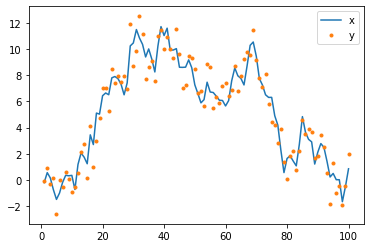

In [30]:
dt = 0.1
F = 1

Q = 1

G = 1

R = 1

steps = 100
m0 = 0  # Suitable initial mean
P0 = 1 # Suitable initial covariance

T = np.zeros((steps,))
X = np.zeros((steps,1))
Y = np.zeros((steps,1))
q = np.zeros(steps)

x = np.random.normal(m0,P0,1)
t = 0

for n in range(steps):
    q[n] = np.random.normal(0,Q,1)
    x = F * x + q[n]
    r = np.random.normal(0,R,1)
    y = G * x + r
    t = t + 1
    T[n] = t
    X[n] = x
    Y[n] = y

plt.clf()
plt.plot(T,X,T,Y,'.')
plt.legend(['x','y'])

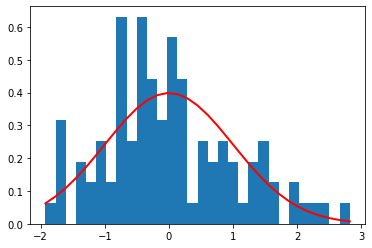

0.012770790531543372
1.0118639860768694


In [31]:
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(q, 30, density=True)
plt.plot(bins, 1/(1 * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - 0)**2 / (2 * 1**2) ),
         linewidth=2, color='r')
plt.show()
print(np.mean(q))
print(np.std(q))

### b) Implement a Kalman filter for the model, and compare its state estimates (= mean) in RMSE sense to using pure measurements as estimates (xk ≈ yk) for the state. Also plot the results.

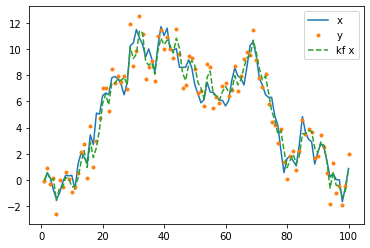

In [32]:
m = m0
P = P0
kf_m = np.zeros((Y.shape[0],1))
kf_P = np.zeros((Y.shape[0],1))
for n in range(Y.shape[0]):
    # Prediction
    m = F * m
    P = F * P * F + Q
    # Update
    S = G * P * G + R
    K = P * G * (1/S)
    m = m + K * (Y[n] - G * m)
    P = P - K * S * K
    kf_m[n] = m
    kf_P[n] = P
    
plt.clf()
plt.plot(T,X,T,Y,'.',T,kf_m,'--')
plt.legend(['x','y','kf x'])

### Compare RMSE

In [33]:
p_rmse_raw = np.sqrt(np.mean((Y - X)**2))
print(p_rmse_raw)

0.9846337473975914


In [34]:
p_rmse_kf = np.sqrt(np.mean((kf_m - X)**2))
print(p_rmse_kf)

0.7909215464782552
